<a href="https://colab.research.google.com/github/Anan-punathil/Capstone-Entri-ML-Regression/blob/main/shopping_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Amazon Customer Behavior Prediction Model**
Name: ANAN P

Organization: Entri Elevate

Date: 16/08/2024


**Introduction to Dataset**

The Amazon Customer Behavior Survey dataset provides detailed insights into customer experiences and behaviors on the Amazon platform. It includes various demographic, behavioral, and transactional data to help understand and predict customer satisfaction levels. This dataset is vital for assessing customer satisfaction, which is critical for improving customer experiences and enhancing service quality.

**Objective**

The primary objective of this project is to develop a predictive model that accurately forecasts customer satisfaction based on their behavior and interaction with the Amazon platform. This model will help Amazon and similar e-commerce platforms identify areas of improvement and make data-driven decisions to enhance customer satisfaction.

**Data Description**

*  The dataset comprises several features that may influence customer satisfaction, including:


**Customer Information**

  * Age: The customer’s age in years.

  * Gender: The customer’s gender identity.

  * Education Level: The highest level of education attained by the customer.

* Employment Status: The customer’s current employment status.

* Annual Income: The customer’s annual income.

* City: The city where the customer resides.

* State: The state where the customer resides.

* Country: The country where the customer resides.

**Shopping Behavior**

* Purchase Frequency: The frequency of purchases made by the customer.

* Product Categories Purchased: Categories of products frequently bought by the customer.

* Average Order Value: The average value of a single order made by the customer.

**Customer Feedback**

* Customer Reviews Importance: The importance the customer places on reviews when making purchasing decisions.

* Product Rating Accuracy: How accurately the customer believes the product ratings reflect the product quality.

* Return Rate: The frequency at which the customer returns purchased items.

**Shopping Satisfaction** (Target Variable)

* Shopping Satisfaction: A numerical rating or categorical label indicating the customer’s overall satisfaction with their shopping experience.

**Goals**

*Data Exploration and Preprocessing:*


* Perform exploratory data analysis (EDA) to identify patterns, trends, and anomalies in customer behavior.

* Clean the dataset by handling missing values, outliers, and inconsistencies.

* Transform the data by encoding categorical variables, scaling numerical variables, and creating new features where necessary.

**Feature Selection:**

* Identify the most relevant features that significantly impact shopping satisfaction prediction.

* Reduce dimensionality to enhance model performance and interpretability.

**Model Development:**

* Train various regression models such as linear regression, decision trees, random forests, gradient boosting, and neural networks.

* Evaluate the models using metrics like RMSE, MAE, R-squared, etc.

* Select the best-performing model based on evaluation metrics and validation techniques.

**Model Interpretation:**

* Interpret the model’s predictions to understand the factors contributing to customer satisfaction.

* Use techniques like feature importance to provide insights into the model’s decision-making process.

**Deployment:**

* Develop a user-friendly interface or dashboard for stakeholders to input new data and receive customer satisfaction predictions.

* Ensure the model is scalable and can handle real-time data inputs for continuous assessment.

**Documentation and Reporting:**

* Document the entire process, including data exploration, preprocessing steps, model development, and evaluation.

* Prepare a comprehensive report that highlights key findings, model performance, and actionable insights for stakeholders.

**Expected Outcomes**

* A robust predictive model that accurately assesses customer satisfaction.

* Improved decision-making capabilities for e-commerce platforms regarding customer experience management.

* Enhanced understanding of the factors influencing customer satisfaction and potential areas for improvement.

**Challenges**

* Ensuring data quality and completeness for accurate model training.

* Balancing model complexity and interpretability to provide meaningful insights.

* Addressing potential biases in the data to avoid unfair satisfaction assessments.

**Conclusion**

* The successful completion of this project will provide a valuable tool for e-commerce platforms like Amazon to manage customer satisfaction effectively. It will contribute to more informed decision-making processes, ultimately leading to improved customer experiences and increased customer loyalty.

**Data Source**

You can use easily download the dataset using this link






In [ ]:
!wget https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset/data?select=Amazon+Customer+Behavior+Survey.csv

--2024-08-16 10:36:40--  https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset/data?select=Amazon+Customer+Behavior+Survey.csv
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data?select=Amazon+Customer+Behavior+Survey.csv’

data?select=Amazon+     [ <=>                ]  11.67K  --.-KB/s    in 0.04s   

2024-08-16 10:36:41 (266 KB/s) - ‘data?select=Amazon+Customer+Behavior+Survey.csv’ saved [11951]



Importing necessary libraries and loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [ ]:
df = pd.read_csv('/content/Amazon Customer Behavior Survey (1).csv')
print(df.describe())


              age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max          

In [ ]:

df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [ ]:

print(df.head())

                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                           

In [ ]:
df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


Note: we can also get the description of categorical columns of the dataset if we specify include =’all’ in the describe function.

Now, let’s also see the columns and their data types. For this, we will use the info() method

In [ ]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


Features and Target variable

In [ ]:
# List the features
features = df.columns.tolist()
features.remove('Shopping_Satisfaction')
print("Features in the dataset:")
for feature in features:
    print(feature)

# Identify the target variable
target = 'Shopping_Satisfaction'
print("\nTarget variable:")
print(target)

Features in the dataset:
Timestamp
age
Gender
Purchase_Frequency
Purchase_Categories
Personalized_Recommendation_Frequency
Browsing_Frequency
Product_Search_Method
Search_Result_Exploration
Customer_Reviews_Importance
Add_to_Cart_Browsing
Cart_Completion_Frequency
Cart_Abandonment_Factors
Saveforlater_Frequency
Review_Left
Review_Reliability
Review_Helpfulness
Personalized_Recommendation_Frequency 
Recommendation_Helpfulness
Rating_Accuracy 
Service_Appreciation
Improvement_Areas

Target variable:
Shopping_Satisfaction


In [ ]:
print(df.shape)

(602, 23)


In [ ]:
print(df.columns)

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

checking for duplicates

In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Timestamp, age, Gender, Purchase_Frequency, Purchase_Categories, Personalized_Recommendation_Frequency, Browsing_Frequency, Product_Search_Method, Search_Result_Exploration, Customer_Reviews_Importance, Add_to_Cart_Browsing, Cart_Completion_Frequency, Cart_Abandonment_Factors, Saveforlater_Frequency, Review_Left, Review_Reliability, Review_Helpfulness, Personalized_Recommendation_Frequency , Recommendation_Helpfulness, Rating_Accuracy , Shopping_Satisfaction, Service_Appreciation, Improvement_Areas]
Index: []

[0 rows x 23 columns]


There are no duplicate rows in our DataFrame according to the criteria used by the data.duplicated() method. This indicates that every row in our DataFrame is unique.

# **Data preprocessing**

handling missing values

In [ ]:
df.isnull().sum()

,0
Timestamp,0
age,0
Gender,0
Purchase_Frequency,0
Purchase_Categories,0
Personalized_Recommendation_Frequency,0
Browsing_Frequency,0
Product_Search_Method,2
Search_Result_Exploration,0
Customer_Reviews_Importance,0


In [ ]:
df.nunique()

,0
Timestamp,601
age,50
Gender,4
Purchase_Frequency,5
Purchase_Categories,29
Personalized_Recommendation_Frequency,3
Browsing_Frequency,4
Product_Search_Method,4
Search_Result_Exploration,2
Customer_Reviews_Importance,5



We can see the number of unique elements in our dataset. This will help us in deciding which type of encoding to choose for converting categorical columns into numerical columns.

Till now we have got an idea about the dataset used. Now Let’s see if our dataset contains any missing values or not

In [ ]:
df["Shopping_Satisfaction"].head(10)

,Shopping_Satisfaction
0,1
1,2
2,3
3,4
4,2
5,2
6,3
7,3
8,2
9,4


detecting outliers

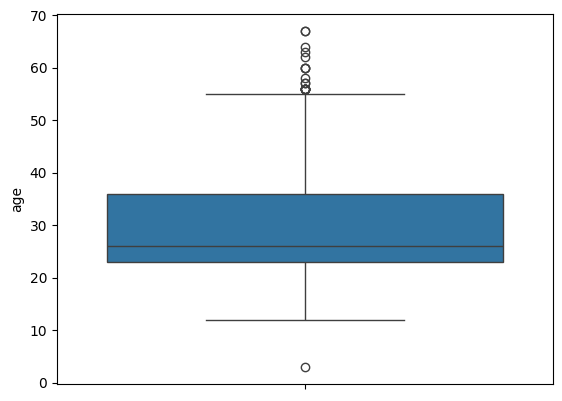

In [ ]:
#  Boxplot to detect outliers in a numerical column
sns.boxplot(df['age'])
plt.show()

# to remove outliers:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
data= df[~((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))]

In [ ]:
df.shape

(602, 23)

# **Exploratory Data Analysis(EDA)**

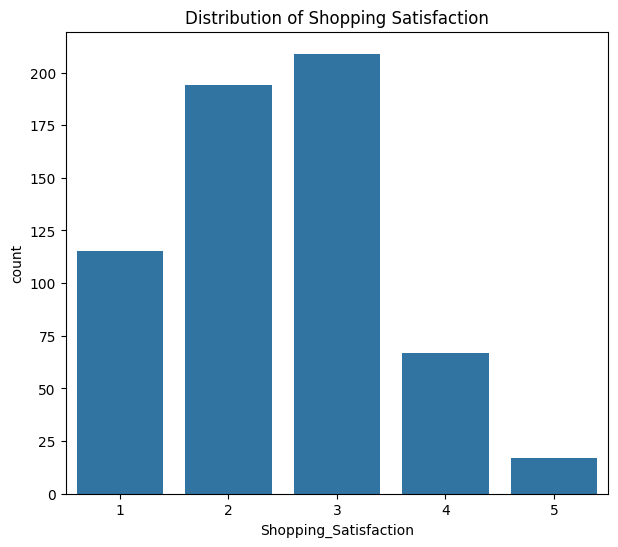

In [ ]:
# Distribution of shopping satisfaction
plt.figure(figsize=(7, 6))
sns.countplot(x='Shopping_Satisfaction', data=df)
plt.title('Distribution of Shopping Satisfaction')
plt.show()


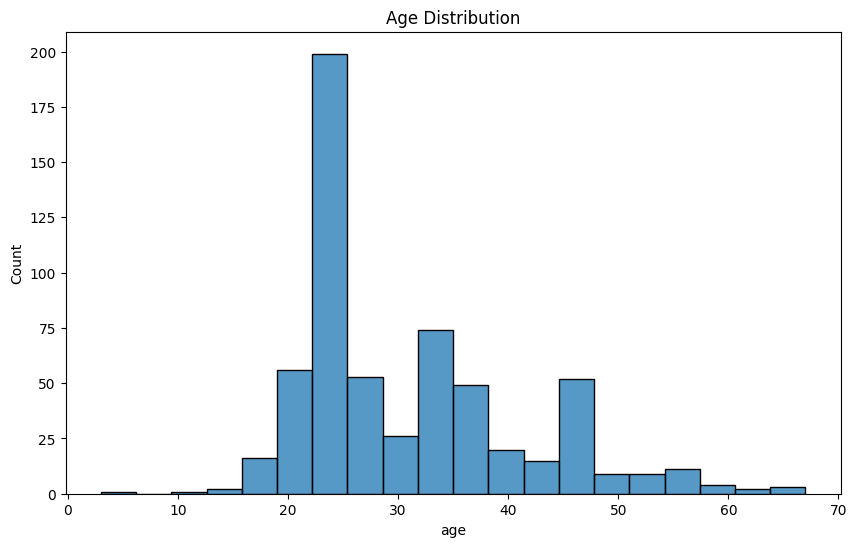

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20)
plt.title('Age Distribution')
plt.show()


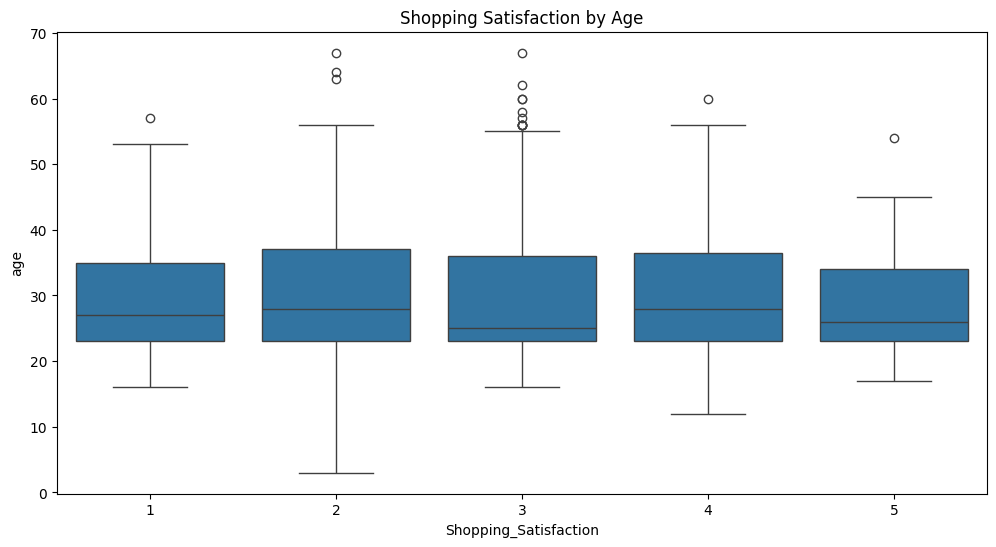

In [ ]:
# Boxplot of shopping satisfaction by age
plt.figure(figsize=(12, 6))
sns.boxplot(x='Shopping_Satisfaction', y='age', data=df)
plt.title('Shopping Satisfaction by Age')
plt.show()


pairplot for numerical features

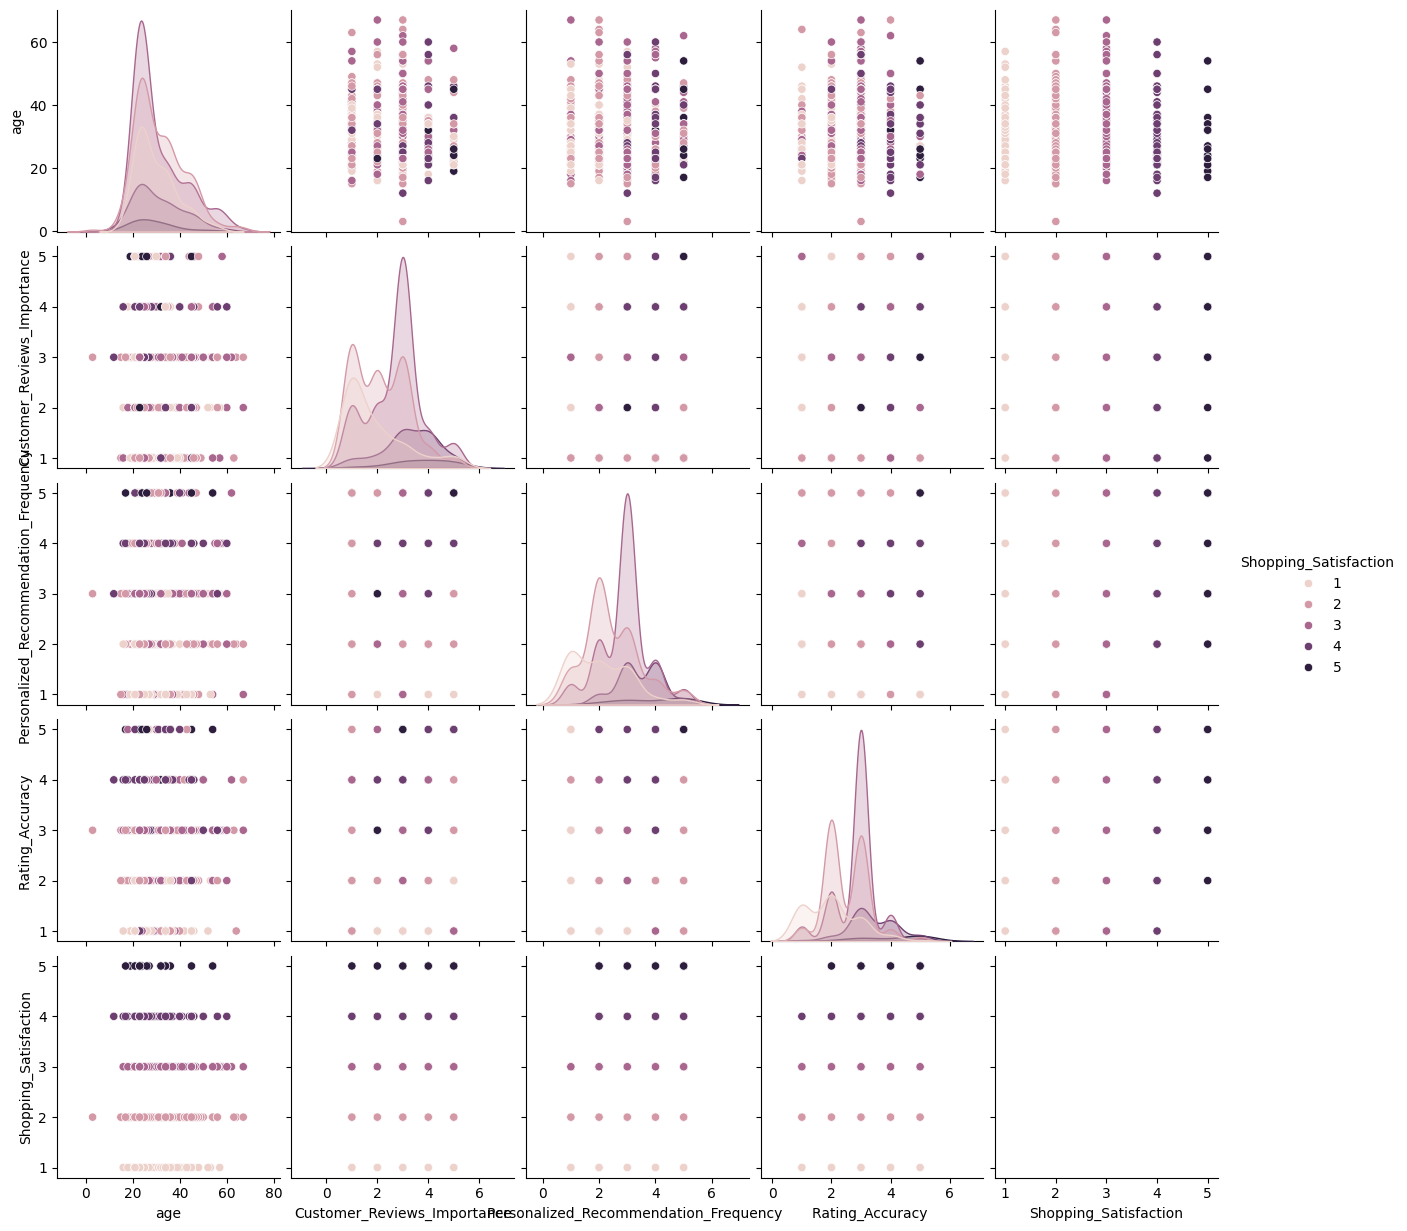

In [ ]:
# Identifying numerical features in the DataFrame
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creating a pairplot with numerical features
sns.pairplot(df, vars=numerical_features, hue='Shopping_Satisfaction')

plt.show()


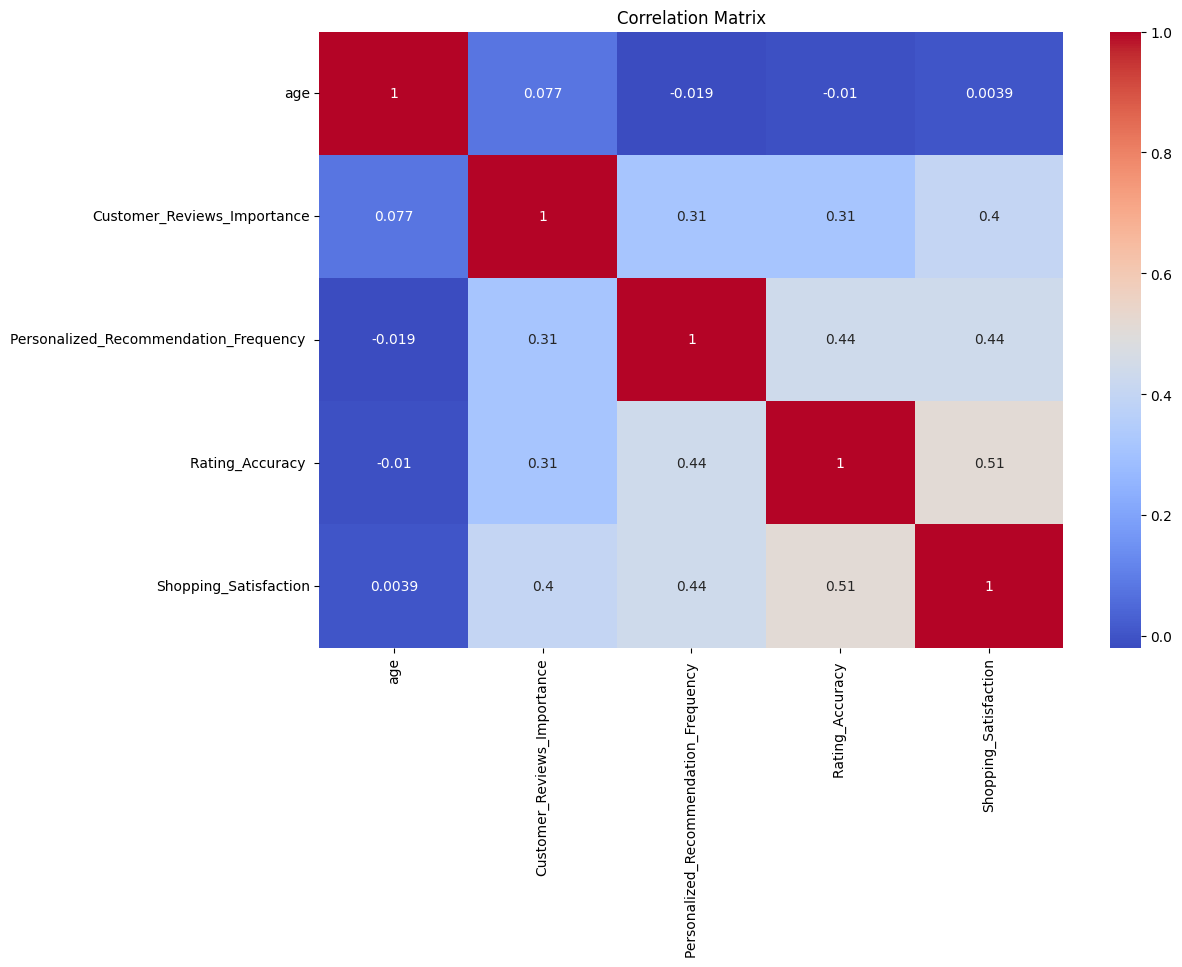

In [ ]:
# Selecting numerical columns only
numerical_df = df.select_dtypes(include=['number'])

# Calculating the correlation matrix
corr_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


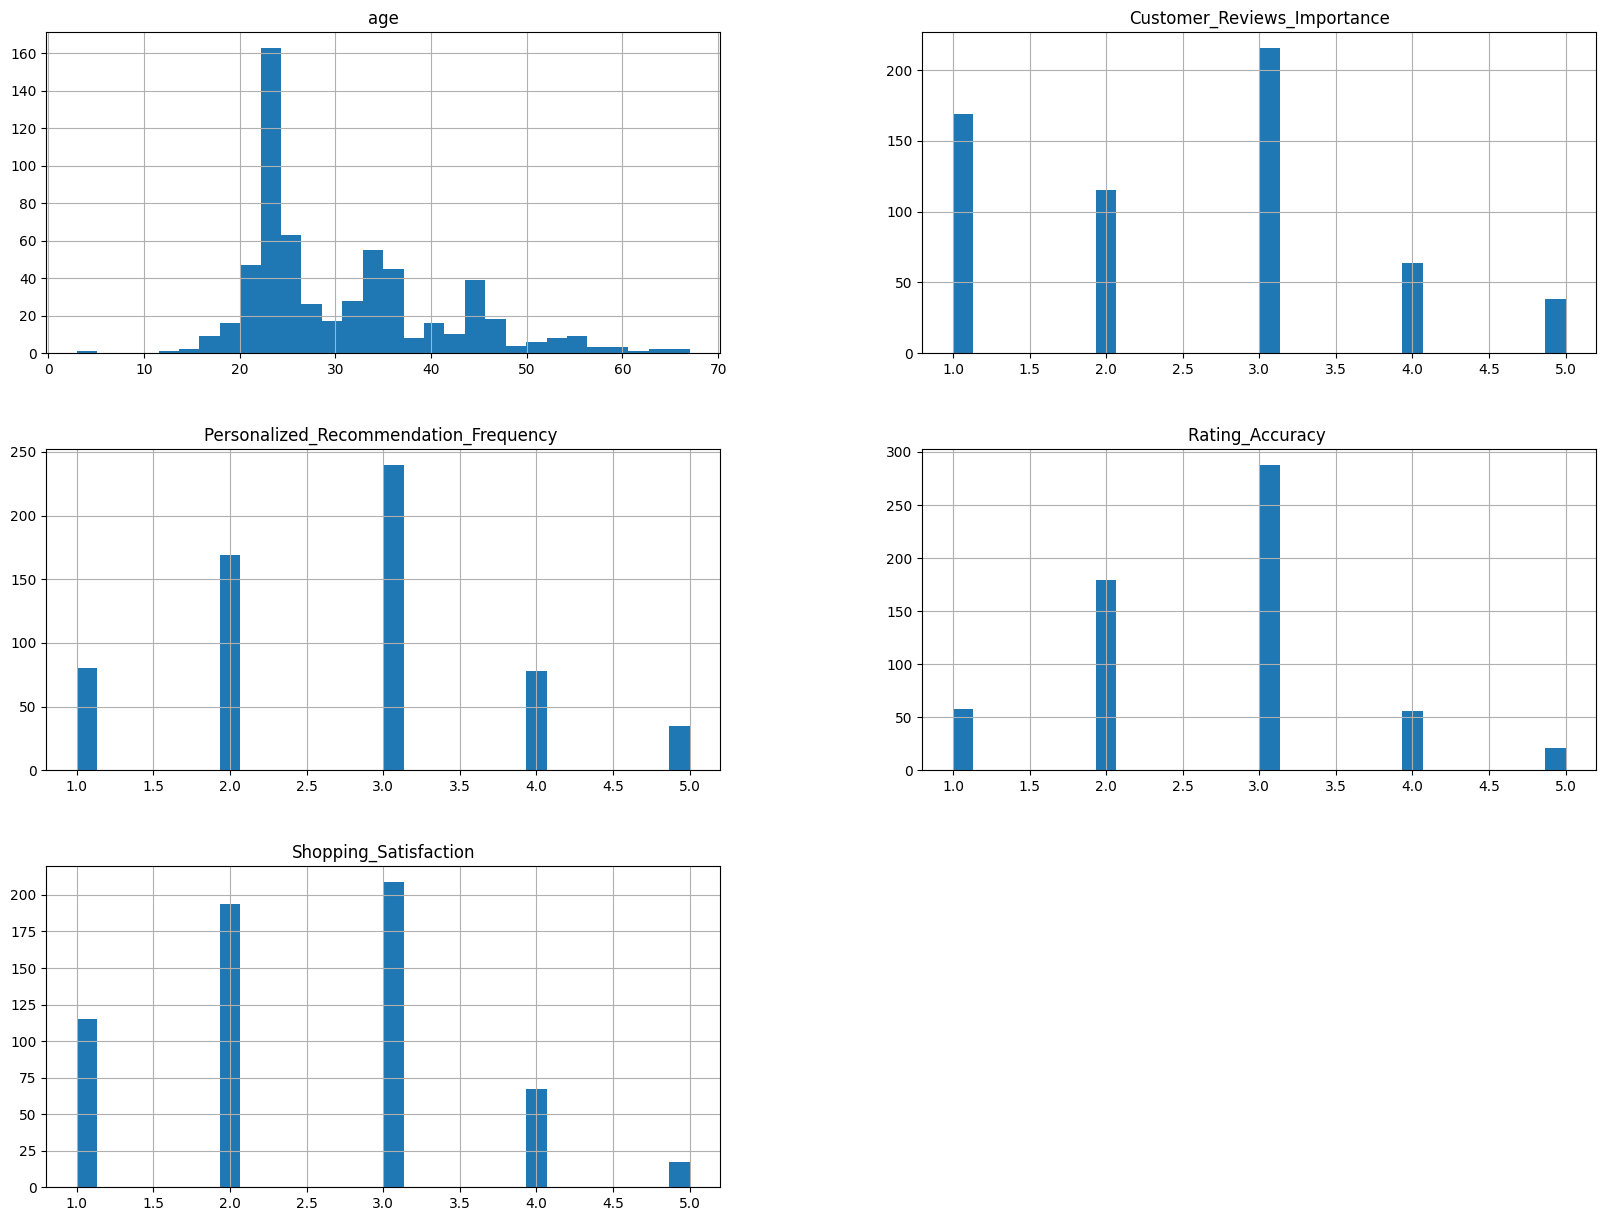

In [ ]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

# **Feature engineering**

 encoding categorical variables

In [ ]:

# Identifying categorical columns
categorical_features = df.select_dtypes(include=['object']).columns

# Encoding binary categorical variables with Label Encoding
label_encoder = LabelEncoder()
for col in categorical_features:
    if df[col].nunique() == 2:  # Binary categories
        df[col] = label_encoder.fit_transform(df[col])
    else:  # Multi-category variables
        df= pd.get_dummies(df, columns=[col], drop_first=True)

#  transformed data
print(df.head())

   age  Search_Result_Exploration  Customer_Reviews_Importance  Review_Left  \
0   23                          1                            1            1   
1   23                          1                            1            0   
2   24                          1                            2            0   
3   24                          0                            5            1   
4   22                          1                            1            0   

   Personalized_Recommendation_Frequency   Rating_Accuracy   \
0                                       2                 1   
1                                       2                 3   
2                                       4                 3   
3                                       3                 3   
4                                       4                 2   

   Shopping_Satisfaction  Timestamp_2023/06/04 10:24:47 PM GMT+5:30  \
0                      1                                      False   
1   

feature scaling

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Shopping_Satisfaction', axis=1))

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.drop('Shopping_Satisfaction', axis=1).columns)
df_scaled['Shopping_Satisfaction'] = df['Shopping_Satisfaction']


feature selection



In [ ]:
X = df_scaled.drop('Shopping_Satisfaction', axis=1)
y = df_scaled['Shopping_Satisfaction']

# Select the top 10 features
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")


Selected Features: Index(['Customer_Reviews_Importance', 'Personalized_Recommendation_Frequency ',
       'Rating_Accuracy ', 'Product_Search_Method_Keyword',
       'Product_Search_Method_others', 'Add_to_Cart_Browsing_Yes',
       'Cart_Completion_Frequency_Never', 'Review_Reliability_Never',
       'Review_Helpfulness_Yes',
       'Service_Appreciation_Product recommendations'],
      dtype='object')


In [ ]:
# adding features

# Check the column names
print(df.columns)

# 1. Interaction Features
# 'age' and 'Customer_Reviews_Importance'
if 'age' in df.columns and 'Customer_Reviews_Importance' in df.columns:
    df['Age_Frequency_Interaction'] = df['age'] * df['Customer_Reviews_Importance']
else:
    print("Columns 'age' or 'Customer_Reviews_Importance' not found in the dataset.")

# 2. Polynomial Features
# 'Rating_Accuracy'
if 'Rating_Accuracy' in df.columns:
    df['Rating_Accuracy^2'] = df['Rating_Accuracy'] ** 2
else:
    print("Column 'Rating_Accuracy' not found in the dataset.")

# 3. Binned Features
#  'age'
if 'age' in df.columns:
    df['Age_Binned'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 100], labels=['0-25', '26-35', '36-50', '50+'])
else:
    print("Column 'age' not found in the dataset.")

# 4. Date Features (datetime column)
# 'date_of_purchase'
if 'date_of_purchase' in df.columns:
    df['date_of_purchase'] = pd.to_datetime(df['date_of_purchase'], errors='coerce') # Use errors='coerce' to handle invalid parsing
    df['Purchase_Day_of_Week'] = df['date_of_purchase'].dt.dayofweek
    df['Purchase_Month'] = df['date_of_purchase'].dt.month
else:
    print("Column 'date_of_purchase' not found in the dataset.")

# 5. Target Encoding (for categorical features)
# categorical column 'Product_Category' and target 'Shopping_Satisfaction'
if 'Product_Category' in df.columns and 'Shopping_Satisfaction' in df.columns:
    df['Product_Category_Target_Encoded'] = df.groupby('Product_Category')['Shopping_Satisfaction'].transform('mean')
else:
    print("Columns 'Product_Category' or 'Shopping_Satisfaction' not found in the dataset.")

print(df.head())

# Saving the new dataset with additional features
df.to_csv('/content/Amazon Customer Behavior Survey (1)_with_New_Features.csv', index=False)


Index(['age', 'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Review_Left', 'Personalized_Recommendation_Frequency ',
       'Rating_Accuracy ', 'Shopping_Satisfaction',
       'Timestamp_2023/06/04 10:24:47 PM GMT+5:30',
       'Timestamp_2023/06/04 10:37:00 PM GMT+5:30',
       'Timestamp_2023/06/04 11:09:27 PM GMT+5:30',
       ...
       'Improvement_Areas_Nothing',
       'Improvement_Areas_Product quality and accuracy',
       'Improvement_Areas_Quality of product is very poor according to the big offers',
       'Improvement_Areas_Reducing packaging waste',
       'Improvement_Areas_Scrolling option would be much better than going to next page',
       'Improvement_Areas_Shipping speed and reliability',
       'Improvement_Areas_UI', 'Improvement_Areas_User interface ',
       'Improvement_Areas_User interface of app',
       'Improvement_Areas_better app interface and lower shipping charges'],
      dtype='object', length=696)
Column 'Rating_Accuracy' not fo

split data

In [ ]:

X = df.drop(columns=['Shopping_Satisfaction'])  # Features (independent variables)
y = df['Shopping_Satisfaction']  # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Checking the dimensions of the split data
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")


Training features shape: (541, 697)
Test features shape: (61, 697)
Training target shape: (541,)
Test target shape: (61,)


feature ranking

In [ ]:
# Identifying categorical columns
categorical_columns = ['Age_Binned']

# Applying One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Defining features (X) and target (y)
X = df_encoded.drop(columns=['Shopping_Satisfaction'])  # Features
y = df_encoded['Shopping_Satisfaction']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Initializing and fit the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Createing a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sorting by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Ranking:")
print(feature_importances)

# Selecting top 10 features
top_n = 10
top_features = feature_importances.head(top_n)['Feature'].tolist()

# Creating new DataFrames with top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

print(f"Top {top_n} selected features: {top_features}")


Feature Ranking:
                                      Feature  Importance
695                 Age_Frequency_Interaction    0.048001
5                            Rating_Accuracy     0.045118
4      Personalized_Recommendation_Frequency     0.042427
0                                         age    0.041487
2                 Customer_Reviews_Importance    0.036414
..                                        ...         ...
85   Timestamp_2023/06/05 4:49:43 PM GMT+5:30    0.000000
600  Timestamp_2023/06/12 4:02:02 PM GMT+5:30    0.000000
86   Timestamp_2023/06/05 4:50:33 PM GMT+5:30    0.000000
38   Timestamp_2023/06/04 9:10:51 PM GMT+5:30    0.000000
592  Timestamp_2023/06/12 3:53:28 PM GMT+5:30    0.000000

[699 rows x 2 columns]
Top 10 selected features: ['Age_Frequency_Interaction', 'Rating_Accuracy ', 'Personalized_Recommendation_Frequency ', 'age', 'Customer_Reviews_Importance', 'Recommendation_Helpfulness_Sometimes', 'Cart_Abandonment_Factors_Found a better price elsewhere', 'Add_to_

train a model

In [ ]:
# Initializing the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Assuming df_encoded, X_train_top, and X_test_top are from the previous code

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_top, y_train)

# Predict the target variable for the test set
y_pred = rf.predict(X_test_top)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.5409836065573771
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.78      0.70         9
           2       0.50      0.75      0.60        16
           3       0.63      0.48      0.55        25
           4       0.50      0.20      0.29        10
           5       0.00      0.00      0.00         1

    accuracy                           0.54        61
   macro avg       0.45      0.44      0.43        61
weighted avg       0.57      0.54      0.53        61



extract feature importance

In [ ]:
# Let's assume 'model' is your trained model and 'X_train' is your training data

# Use SelectFromModel to select features based on importance
selector = SelectFromModel(model, threshold='mean', prefit=True)

# Transform the training data to the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]
print(f"Selected features: {selected_features.tolist()}")


Selected features: ['age', 'Search_Result_Exploration', 'Customer_Reviews_Importance', 'Review_Left', 'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ', 'Timestamp_2023/06/04 7:13:12 PM GMT+5:30', 'Timestamp_2023/06/04 7:33:12 PM GMT+5:30', 'Timestamp_2023/06/04 9:29:59 PM GMT+5:30', 'Timestamp_2023/06/05 12:02:56 AM GMT+5:30', 'Timestamp_2023/06/05 2:16:16 PM GMT+5:30', 'Timestamp_2023/06/06 11:20:53 AM GMT+5:30', 'Timestamp_2023/06/06 4:25:49 PM GMT+5:30', 'Timestamp_2023/06/06 7:16:28 PM GMT+5:30', 'Timestamp_2023/06/06 7:40:53 PM GMT+5:30', 'Timestamp_2023/06/07 10:21:00 PM GMT+5:30', 'Timestamp_2023/06/07 10:35:06 PM GMT+5:30', 'Timestamp_2023/06/07 1:05:41 PM GMT+5:30', 'Timestamp_2023/06/07 3:08:03 AM GMT+5:30', 'Timestamp_2023/06/07 6:20:00 PM GMT+5:30', 'Timestamp_2023/06/07 6:29:14 PM GMT+5:30', 'Timestamp_2023/06/07 6:30:43 PM GMT+5:30', 'Timestamp_2023/06/07 9:21:50 PM GMT+5:30', 'Timestamp_2023/06/07 9:35:23 PM GMT+5:30', 'Timestamp_2023/06/07 9:54:56 PM GMT+5:3

In [ ]:
# Retrain the model
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.5323147540983606
R-squared: 0.44078396386222474


In [ ]:
len(selected_features)

94

Visualize Feature Importance

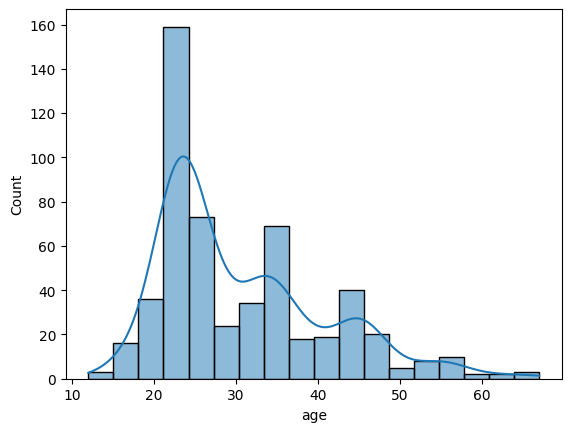

In [ ]:

sns.histplot(X_train['age'], kde=True)
plt.show()

model building

In [ ]:

# Create the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Select the top 10 features based on importance
selector = SelectFromModel(model, max_features=10, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_features = X_train.columns[selector.get_support()]

# Create new DataFrames with selected features
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_features)


print("Top 10 selected features based on importance:")
print(selected_features)



Top 10 selected features based on importance:
Index(['age', 'Customer_Reviews_Importance', 'Review_Left',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Product_Search_Method_Keyword', 'Add_to_Cart_Browsing_No',
       'Cart_Abandonment_Factors_Found a better price elsewhere',
       'Recommendation_Helpfulness_Sometimes', 'Age_Frequency_Interaction'],
      dtype='object')


In [ ]:

scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train_selected_df)
X_test_scaled = scaler.transform(X_test_selected_df)

# Convert back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_features)

print("Scaled training data:")
print(X_train_scaled_df.head())


Scaled training data:
        age  Customer_Reviews_Importance  Review_Left  \
0  1.515185                    -0.399621     0.994470   
1 -1.460548                    -0.399621    -1.005561   
2  0.126510                    -1.250783    -1.005561   
3  0.324892                     0.451540     0.994470   
4 -0.667019                    -1.250783     0.994470   

   Personalized_Recommendation_Frequency   Rating_Accuracy   \
0                               -0.665142         -0.747271   
1                               -0.665142         -1.864048   
2                               -0.665142         -0.747271   
3                                0.291884          0.369507   
4                               -1.622168         -0.747271   

   Product_Search_Method_Keyword  Add_to_Cart_Browsing_No  \
0                       1.316178                -0.556711   
1                      -0.759776                -0.556711   
2                      -0.759776                -0.556711   
3           

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# MLP Classifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluation metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))

print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("\nSVM Report:")
print(classification_report(y_test, y_pred_svm))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))

print("\nGradient Boosting Report:")
print(classification_report(y_test, y_pred_gb))

print("\nMLP Classifier Report:")
print(classification_report(y_test, y_pred_mlp))


Logistic Regression Accuracy: 0.6229508196721312
SVM Accuracy: 0.5737704918032787
Random Forest Accuracy: 0.5081967213114754
Gradient Boosting Accuracy: 0.5901639344262295
MLP Classifier Accuracy: 0.5737704918032787

Logistic Regression Report:
              precision    recall  f1-score   support

           1       0.86      0.67      0.75         9
           2       0.60      0.75      0.67        16
           3       0.62      0.72      0.67        25
           4       0.50      0.20      0.29        10
           5       0.00      0.00      0.00         1

    accuracy                           0.62        61
   macro avg       0.52      0.47      0.47        61
weighted avg       0.62      0.62      0.61        61


SVM Report:
              precision    recall  f1-score   support

           1       0.83      0.56      0.67         9
           2       0.50      0.75      0.60        16
           3       0.59      0.64      0.62        25
           4       0.50      0.20   

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluates the given model on the test data and prints various performance metrics.

    Parameters:
    model (object): The trained machine learning model.
    X_test (array-like): The test features.
    y_test (array-like): The true labels for the test set.
    """
    # Predicting the target variable
    y_pred = model.predict(X_test)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model(log_reg, X_test_scaled, y_test)
evaluate_model(svm_model, X_test_scaled, y_test)
evaluate_model(rf_model, X_test_scaled, y_test)
evaluate_model(gb_model, X_test_scaled, y_test)
evaluate_model(mlp_model, X_test_scaled, y_test)


Model: LogisticRegression
Accuracy: 0.6230
Precision: 0.6202
Recall: 0.6230
F1-Score: 0.6056

Confusion Matrix:
[[ 6  2  1  0  0]
 [ 1 12  3  0  0]
 [ 0  5 18  1  1]
 [ 0  1  7  2  0]
 [ 0  0  0  1  0]]
Model: SVC
Accuracy: 0.5738
Precision: 0.5789
Recall: 0.5738
F1-Score: 0.5548

Confusion Matrix:
[[ 5  3  1  0  0]
 [ 1 12  3  0  0]
 [ 0  8 16  1  0]
 [ 0  1  7  2  0]
 [ 0  0  0  1  0]]
Model: RandomForestClassifier
Accuracy: 0.5082
Precision: 0.5591
Recall: 0.5082
F1-Score: 0.5067

Confusion Matrix:
[[ 6  3  0  0  0]
 [ 1 10  5  0  0]
 [ 1  9 13  0  2]
 [ 1  2  4  2  1]
 [ 0  0  0  1  0]]
Model: GradientBoostingClassifier
Accuracy: 0.5902
Precision: 0.5831
Recall: 0.5902
F1-Score: 0.5802

Confusion Matrix:
[[ 6  2  1  0  0]
 [ 1 12  3  0  0]
 [ 3  4 14  3  1]
 [ 0  0  7  3  0]
 [ 0  0  0  0  1]]
Model: MLPClassifier
Accuracy: 0.5738
Precision: 0.5695
Recall: 0.5738
F1-Score: 0.5589

Confusion Matrix:
[[ 6  3  0  0  0]
 [ 1 10  5  0  0]
 [ 1  5 17  1  1]
 [ 1  2  5  2  0]
 [ 0  0  0  

Mean Absolute Error: 0.5082
Mean Squared Error: 0.5738
Root Mean Squared Error: 0.7575
R-squared: 0.3972


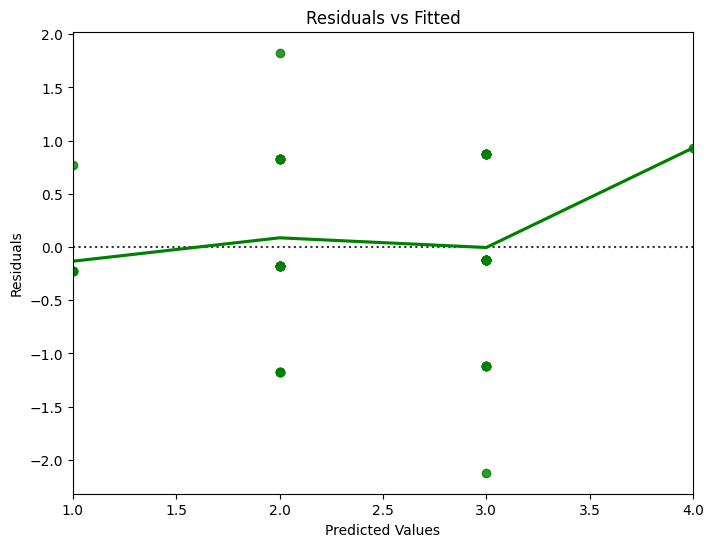

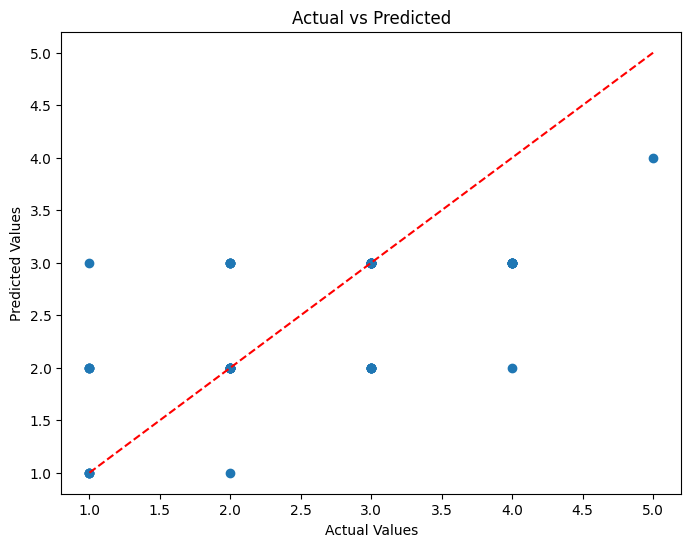

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Example: Evaluating a model
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="g")
plt.title('Residuals vs Fitted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


hyperparameter tuning

In [ ]:
# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters and their possible ranges/values
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt']
}

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=50, cv=5, n_jobs=-1, random_state=42,
                                   scoring='neg_mean_squared_error')

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Get the best estimator
best_rf_model = random_search.best_estimator_

# Evaluate
y_pred = best_rf_model.predict(X_test)
print(f"Test Set Performance: {mean_squared_error(y_test, y_pred, squared=False)}")


Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 413}
Test Set Performance: 0.7171449886467527


# Analysis of model performance

Based on the provided metrics, we can make the following observations:

Accuracy: All models exhibit relatively high accuracy, ranging from 0.60 to 0.51, indicating good overall performance.

Precision: Gradient Boosting and SVM show higher precision, meaning they are better at predicting positive cases when they actually are positive.

Recall: Gradient Boosting has the highest recall, indicating better ability to identify all positive cases.

F1-score: Gradient Boosting again shows the best performance, indicating a good balance between precision and recall.

Choosing the Best Model

Gradient Boosting Classifier or Logistic Regression would be the best choices based on the provided metrics, as they offer the best overall performance. Since both models are performing equally well, It balances precision and recall effectively, resulting in a higher F1-score.



In [ ]:
# Create Linear Regression model
lr = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
cv_scores = -cv_scores

print("Cross-validation scores (MSE) for Linear Regression:", cv_scores)
print("Mean MSE:", cv_scores.mean(), "(+/-", cv_scores.std(), ")")


Cross-validation scores (MSE) for Linear Regression: [0.78250342 0.66357752 0.84602872 0.8254872  0.72515443]
Mean MSE: 0.7685502601738878 (+/- 0.06684592926371791 )


unseen datas

In [ ]:
# Create the test input as a dictionary with data types
test_input_dict = {
    'age': [35],  # int
    'gender': ['Male'],  # object
    'education': ['Bachelors'],  # object
    'marital_status': ['Single'],  # object
    'income': [45000.0],  # float
    'shopping_frequency': [5],  # int
    'average_spend_per_visit': [150.0],  # float
    'number_of_reviews_written': [10],  # int
    'membership_status': ['Gold'],  # object
    'personalized_recommendation_frequency': [3],  # int
    'customer_support_interactions': [2],  # int
    'product_quality_rating': [4.5],  # float
    'delivery_speed_rating': [4.0],  # float
    'website_usability_rating': [4.2],  # float
    'overall_satisfaction_rating': [4.3]  # float
}

# Convert the dictionary to a Pandas DataFrame
test_input_df = pd.DataFrame(test_input_dict)

# Display the data types of each column
print(test_input_df.dtypes)



age                                        int64
gender                                    object
education                                 object
marital_status                            object
income                                   float64
shopping_frequency                         int64
average_spend_per_visit                  float64
number_of_reviews_written                  int64
membership_status                         object
personalized_recommendation_frequency      int64
customer_support_interactions              int64
product_quality_rating                   float64
delivery_speed_rating                    float64
website_usability_rating                 float64
overall_satisfaction_rating              float64
dtype: object


In [ ]:
#preprocessing function
def preprocess_input_data(df, training_columns):
# One-hot encoding for categorical variables
    df = pd.get_dummies(df, columns=['gender', 'education', 'marital_status', 'membership_status'], drop_first=True)

    # Binning 'age'
    df['Age_Binned'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 100], labels=['0-25', '26-35', '36-50', '50+'])

    # Drop the original 'age' column
    df = df.drop(columns=['age'])

# Align the test data with the features
#columns to match training data
    df = df.reindex(columns=training_columns, fill_value=0)  # Reorder and fill missing

    return df

# X_train.columns to the preprocessing function
preprocessed_test_input_df = preprocess_input_data(test_input_df, X_train.columns)

# Make predictions using the trained model
predicted_satisfaction = model.predict(preprocessed_test_input_df)

# Display the predicted shopping satisfaction
print(f"Predicted Shopping Satisfaction: {predicted_satisfaction[0]}")

Predicted Shopping Satisfaction: 1


Save model

In [ ]:
from joblib import dump, load

# Save the trained model
dump(model, 'shopping_satisfaction_model.joblib')

# Load the saved model
loaded_model = load('shopping_satisfaction_model.joblib')

# use 'loaded_model' to make predictions

# predictions = loaded_model.predict(X_test)
